In [55]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings 

warnings.filterwarnings("ignore")


In [80]:
dt = pd.read_csv("olimpiyatlar_temizlenmis.csv")
dt.head()
dt2 = pd.read_csv("olimpiyatlar_temizlenmis_20220204.csv")
dt3 = pd.read_csv("olmpyics_clear.csv")

In [81]:
dt.info()
dt2.info()
dt3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39783 entries, 0 to 39782
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   isim      39783 non-null  object 
 1   cinsiyet  39783 non-null  object 
 2   yas       39783 non-null  float64
 3   boy       39783 non-null  float64
 4   kilo      39783 non-null  float64
 5   takim     39783 non-null  object 
 6   uok       39783 non-null  object 
 7   yil       39783 non-null  int64  
 8   sezon     39783 non-null  object 
 9   sehir     39783 non-null  object 
 10  spor      39783 non-null  object 
 11  etkinlik  39783 non-null  object 
 12  madalya   39783 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 3.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39783 entries, 0 to 39782
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   isim      39783 non-null  object 
 1   cinsiyet  397

In [58]:
dt = dt.rename(columns={"isim" : "Name" , "cinsiyet" : "Gender" , "yas" : "Age" , "boy" : "Height" , "kilo" : "Weight" , "takim" : "Team" ,"uok":"NOC","yil" : "Year" , "sezon" : "Season", "sehir": "City", "spor" : "Sport" , "etkinlik" : "Event", "madalya" : "Medal"})
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39783 entries, 0 to 39782
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    39783 non-null  object 
 1   Gender  39783 non-null  object 
 2   Age     39783 non-null  float64
 3   Height  39783 non-null  float64
 4   Weight  39783 non-null  float64
 5   Team    39783 non-null  object 
 6   NOC     39783 non-null  object 
 7   Year    39783 non-null  int64  
 8   Season  39783 non-null  object 
 9   City    39783 non-null  object 
 10  Sport   39783 non-null  object 
 11  Event   39783 non-null  object 
 12  Medal   39783 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 3.9+ MB


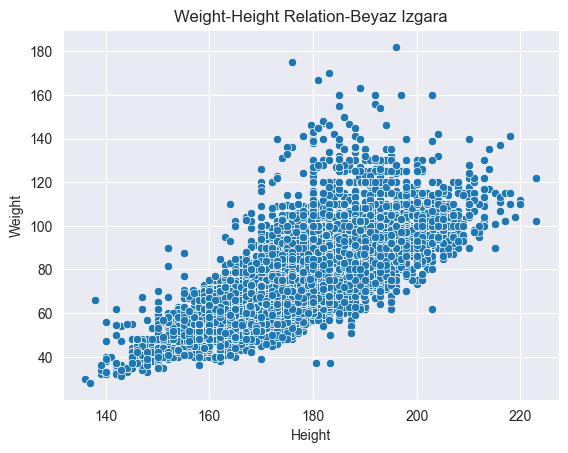

In [59]:

def drawScatter():
    sns.scatterplot(x = "Height" , y= "Weight" ,data = dt)
    plt.title('Weight-Height Relation-Beyaz Izgara')
    plt.show()

drawScatter()

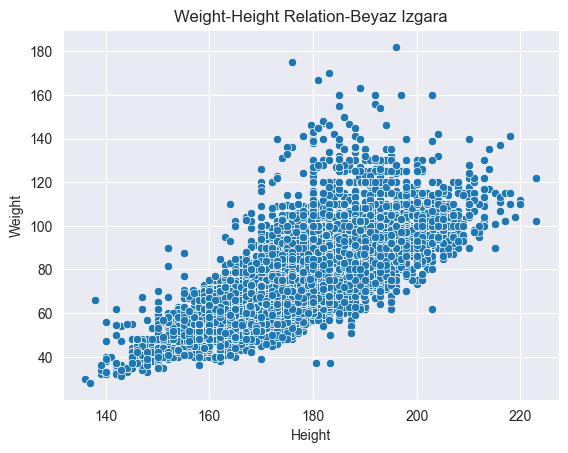

In [60]:
sns.set_style("darkgrid")
drawScatter()

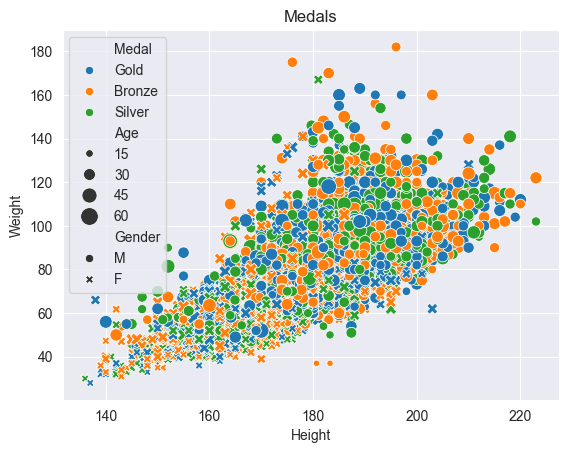

In [61]:
sns.scatterplot(x="Height" ,y = "Weight" , hue= "Medal" ,style="Gender" ,size = "Age", sizes = (15,200),data = dt)
plt.title("Medals")
plt.show()

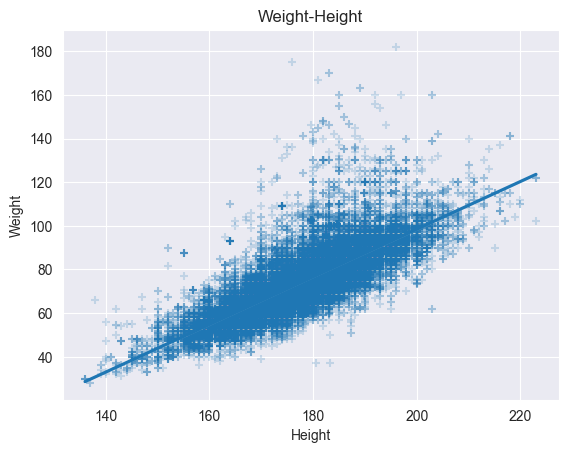

In [62]:
sns.regplot(x = "Height" , y = "Weight" , data = dt , marker = '+' , scatter_kws={'alpha' : 0.2})
plt.title("Weight-Height")
plt.show()

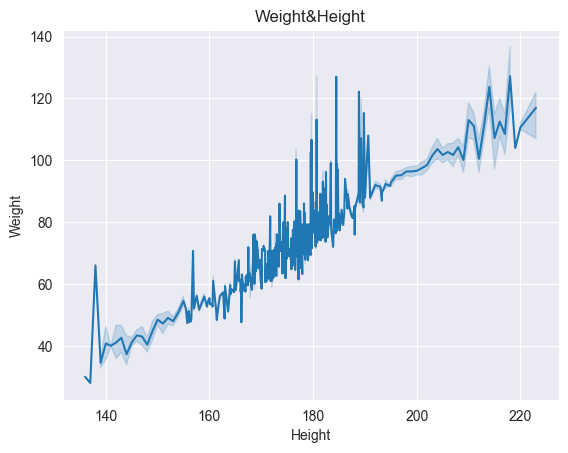

In [63]:
sns.lineplot(x = "Height" , y = "Weight" , data = dt)
plt.title("Weight&Height")
plt.show()

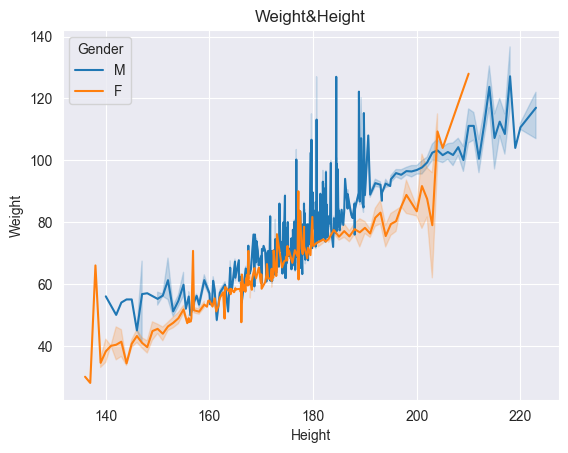

In [64]:
sns.lineplot(x = "Height" , y = "Weight" ,hue = "Gender", data = dt)
plt.title("Weight&Height")
plt.show()

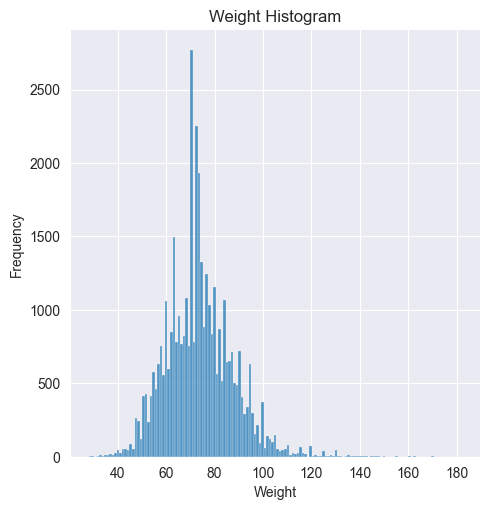

In [65]:
sns.displot(dt, x = "Weight")
plt.ylabel("Frequency")
plt.title("Weight Histogram")
plt.show()


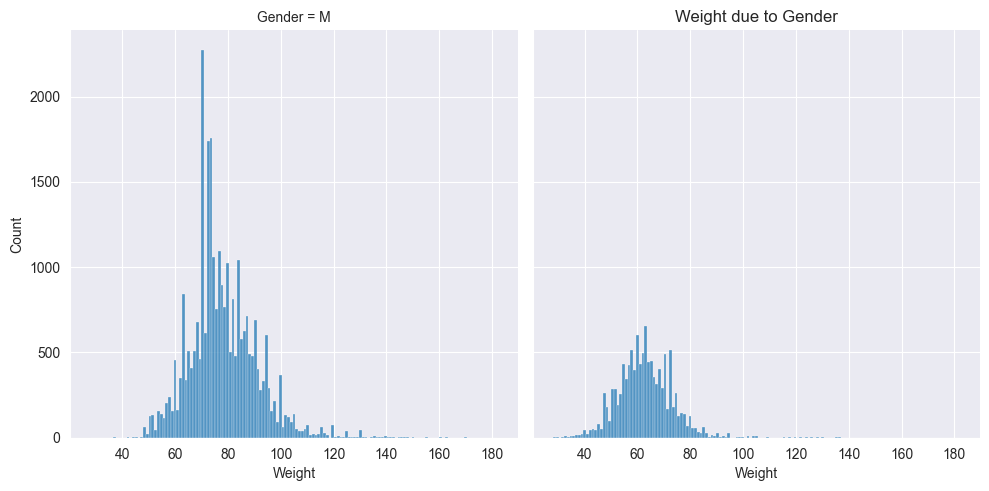

In [66]:
sns.displot(dt, x="Weight" , col = "Gender",multiple ="dodge")
plt.ylabel("Frequency")
plt.title("Weight due to Gender")
plt.show()

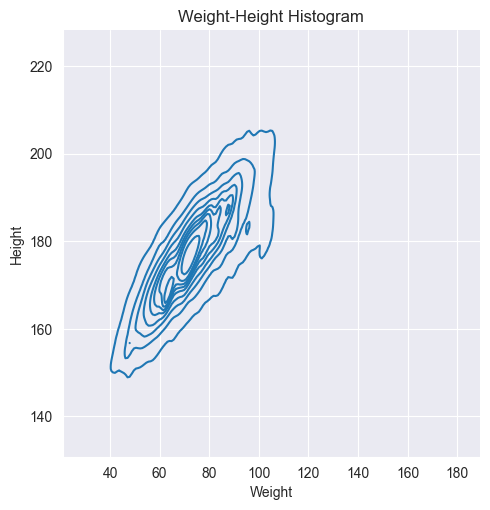

In [67]:
sns.displot(dt , x= "Weight" , y = "Height" , kind ="kde")
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("Weight-Height Histogram")
plt.show()

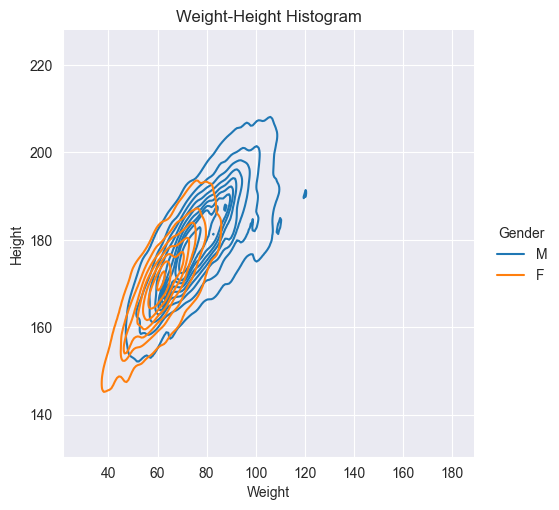

In [68]:
sns.displot(dt , x= "Weight" , y = "Height" ,hue = "Gender" , kind ="kde")
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("Weight-Height Histogram")
plt.show()

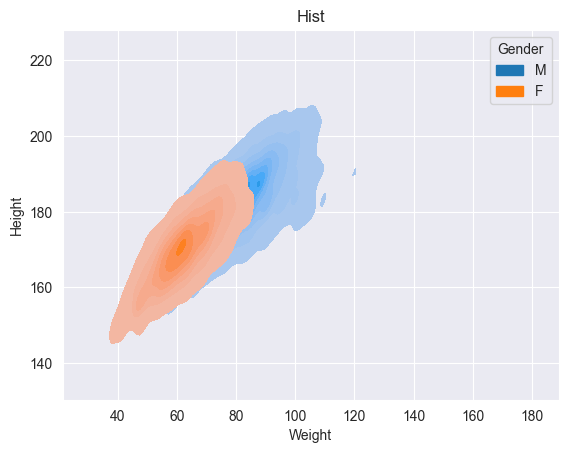

In [69]:
sns.kdeplot(data = dt ,x="Weight" , y= "Height" ,hue = "Gender"  ,fill= True)
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("Hist")
plt.show()

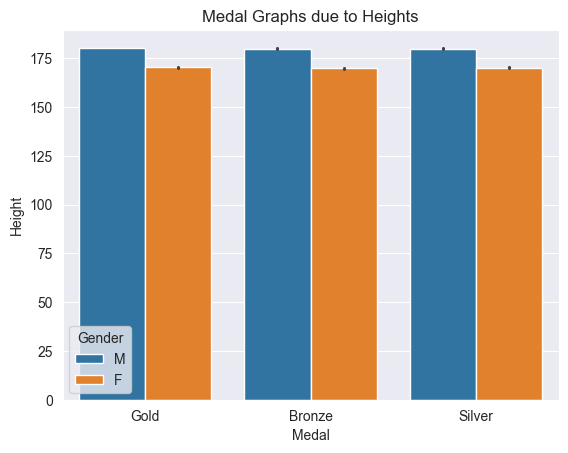

In [70]:
sns.barplot(x = "Medal" , y= "Height", hue="Gender", data = dt)
plt.title("Medal Graphs due to Heights")
plt.show()

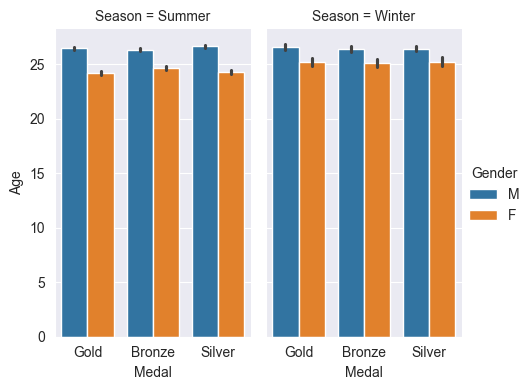

In [71]:
sns.catplot(x = "Medal" , y="Age",hue= "Gender",col ="Season",data= dt,kind ="bar", height= 4,aspect=0.6)
plt.show()

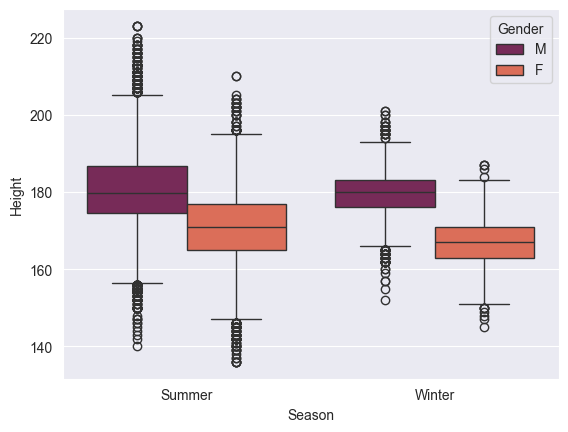

In [72]:
sns.boxplot(x="Season",y="Height", hue= "Gender" ,data = dt ,palette="rocket")
plt.show()

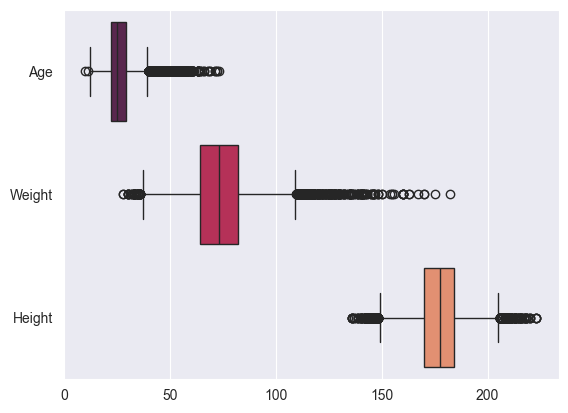

In [74]:
dt_copy = dt.loc[:,["Age","Weight","Height"]]
sns.boxplot(data= dt_copy,orient="h",palette="rocket")
plt.show()

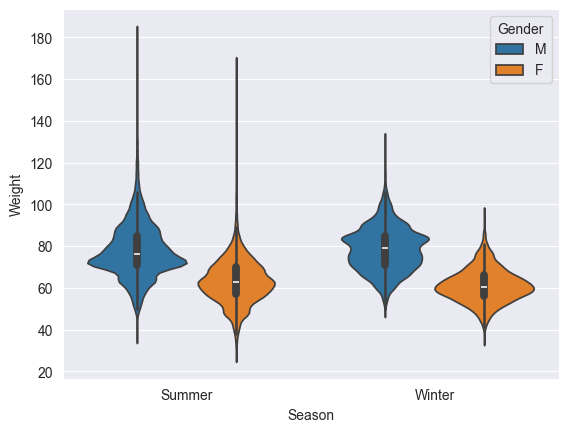

In [87]:
sns.violinplot(x ="Season" ,y = "Weight" ,data=dt3, hue= "Gender")
plt.show()

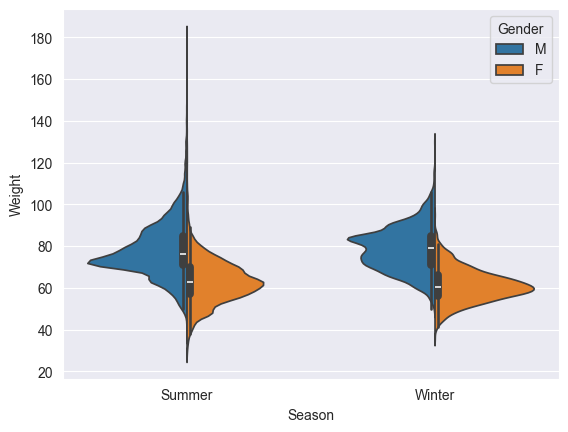

In [88]:
sns.violinplot(x ="Season" ,y = "Weight" ,data=dt3, hue= "Gender" , split= True)
plt.show()

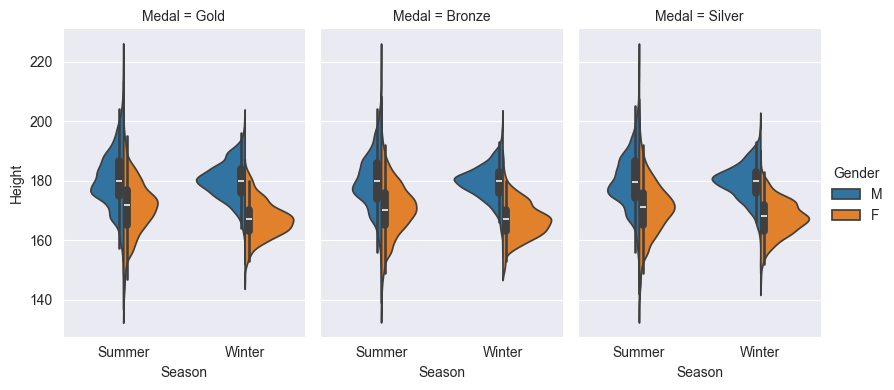

In [89]:
sns.catplot(x = "Season" , y = "Height" ,hue= "Gender" , col = "Medal" , data = dt3 ,kind= "violin" ,split = True , height= 4 ,aspect= 0.7)
plt.show()

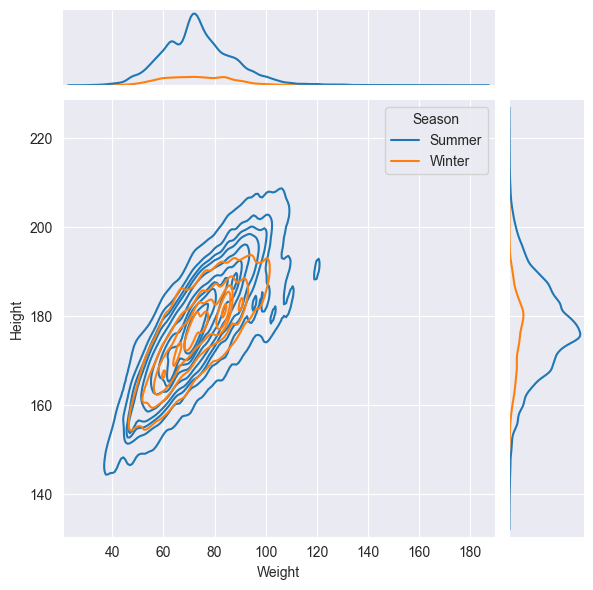

In [91]:
sns.jointplot(data = dt3 ,x = "Weight" ,y = "Height" ,hue = "Season" ,kind= "kde")
plt.show() 

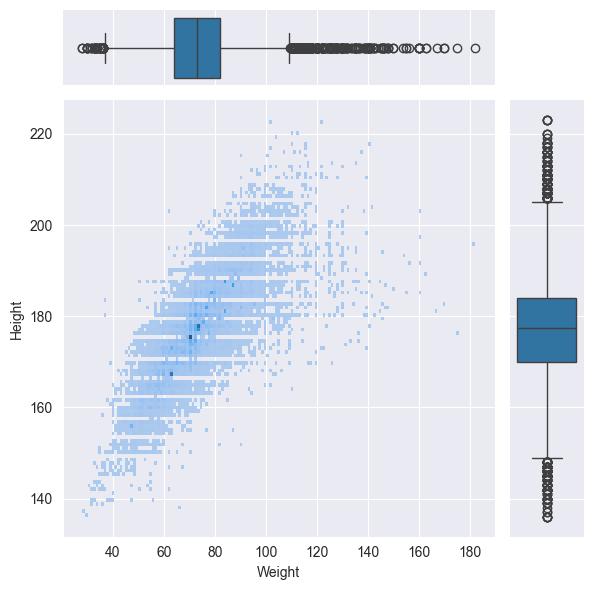

In [93]:
g = sns.JointGrid(data = dt3 ,x = "Weight" , y = "Height")
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot)
plt.show()

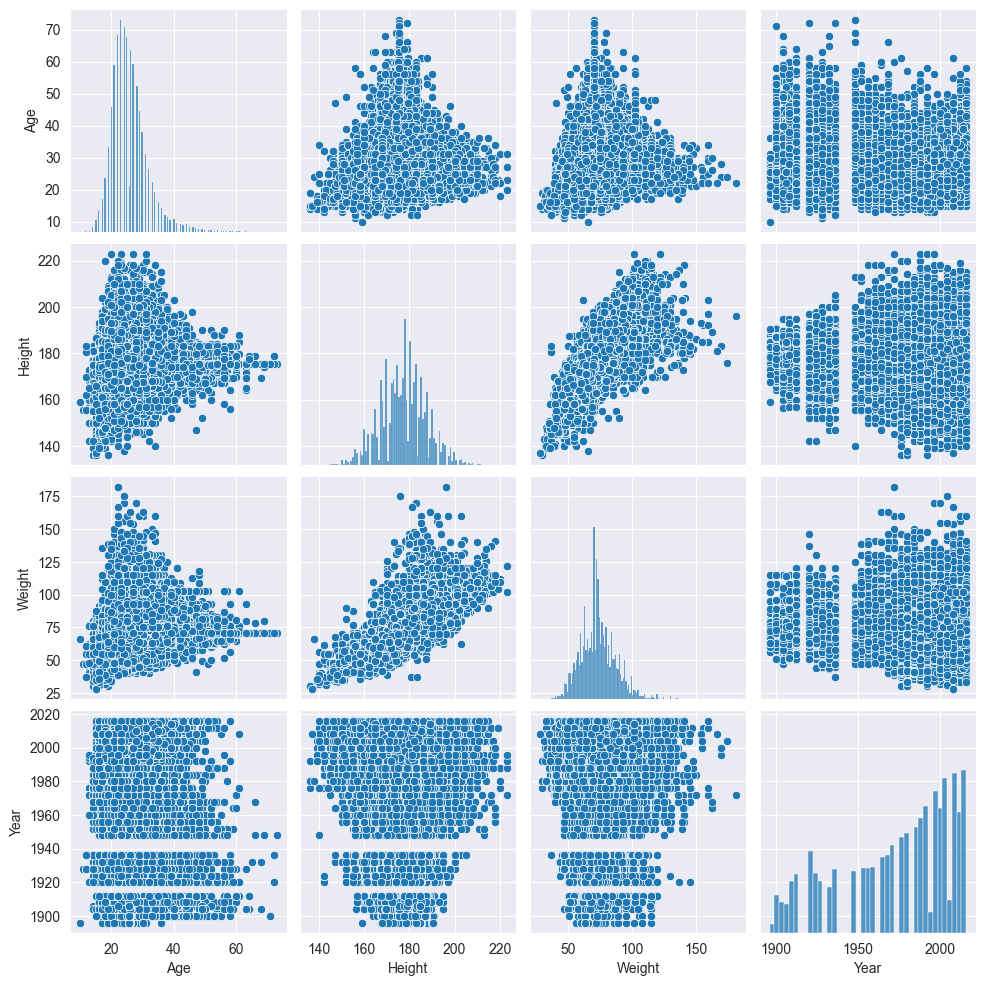

In [94]:
sns.pairplot(dt3)
plt.show()

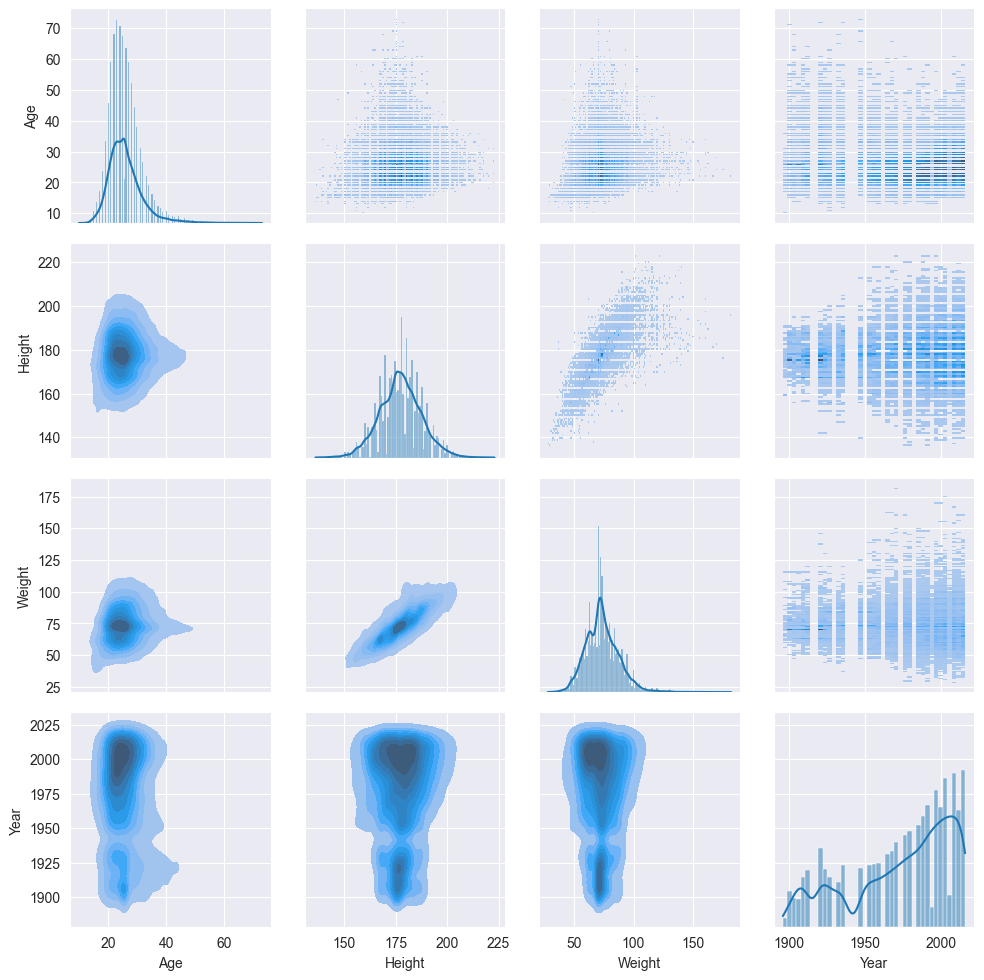

In [96]:
g = sns.PairGrid(dt3)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill = True)
g.map_diag(sns.histplot,kde = True)

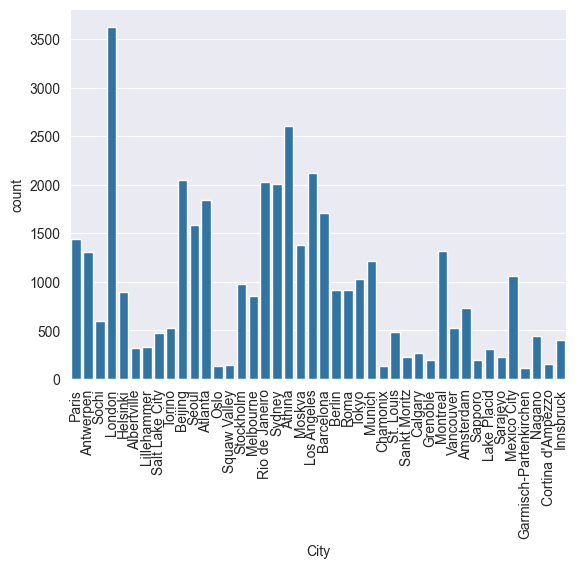

In [97]:
sns.countplot(x = "City" , data = dt3)
plt.xticks(rotation = 90)
plt.show()